In [182]:
%matplotlib inline
import numpy as np
import pandas as pd

In [184]:
#load in our csv
data_dir = 'data'
bank_data_str = 'bank-additional'
bank_file_full = 'bank-additional-full.csv'
df = pd.read_csv('./'+data_dir+'/'+bank_data_str+'/'+bank_file_full, sep=';',na_values='unknown')

#the head() method will show the first 5 lines of the file
df = df.dropna()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### That's better, now let's explore some of the data

In [185]:
# We can make a new column in our dataframe by passing in 
df['age_bin'] = pd.cut(df['age'], bins=10)

In [186]:
pd.crosstab(df['age_bin'],df['y'])


y,no,yes
age_bin,,
"(16.922, 24.8]",665,199
"(24.8, 32.6]",7382,1127
"(32.6, 40.4]",8729,1031
"(40.4, 48.2]",5160,550
"(48.2, 56]",3308,434
"(56, 63.8]",1074,250
"(63.8, 71.6]",156,133
"(71.6, 79.4]",97,80
"(79.4, 87.2]",41,44


### So now we can see the rate of conversion for our different age groups, but it doesn't seem like we made our bins very well. How would we make a better choice of binning?

In [187]:
# hints: http://chrisalbon.com/python/pandas_binning_data.html

### Let's suppose we now want to know the traits of the users that are most likely to convert. How can we approach this?

In [188]:
df['y'].value_counts()/df['y'].shape[0]

no     0.873426
yes    0.126574
Name: y, dtype: float64

In [189]:
# It seems that 12% of our users converted, which is pretty awesome ... maybe?

## Let's start to visualize some of the data

### Let's just make a plot of the distribution of ages in the dataset. What type of a plot might be good?


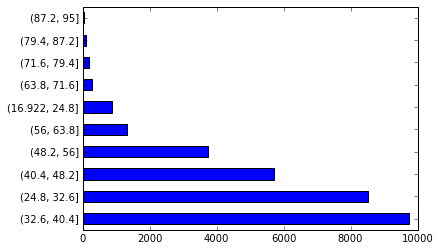

In [192]:
df['age_bin'].value_counts().plot(kind='barh')

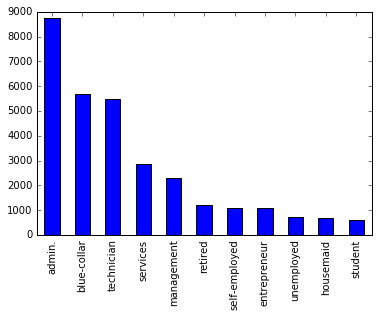

In [195]:
df['job'].value_counts().plot(kind='bar')

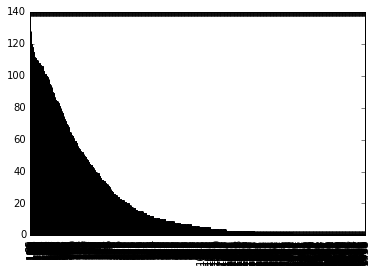

In [201]:
# Eventually, you'll do something like this
df['duration'].value_counts().plot(kind='bar')

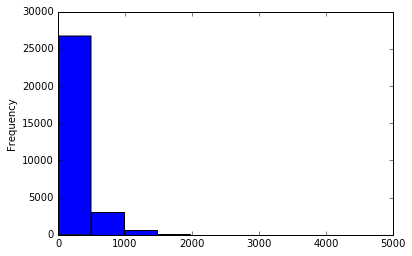

In [213]:
# Clearly a bar chart with 1000s of categorical variables is not the right approach with an integer varable
df['duration'].plot(kind='hist')

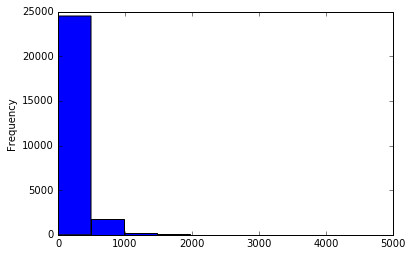

In [214]:
df[df['y'] == 'no']['duration'].plot(kind='hist')

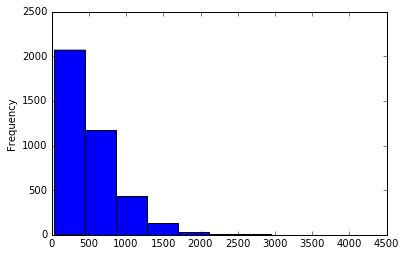

In [217]:
df[df['y'] == 'yes']['duration'].plot(kind='hist')

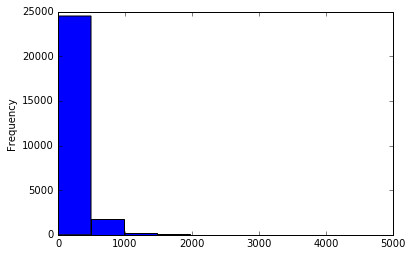

In [218]:
df[df['y'] == 'no']['duration'].plot(kind='hist')

In [224]:
# Questions for basic plots

### Make a plot of the marital status of the users, grouped by age bin

In [225]:
# Matplotlib
# Show bar plots with two plots
# Show subplots

In [ ]:
# Show histograms in two colors

In [ ]:
def plot_hists(data, features, fs=3, bs=30, a=0.3, fsize=18):
    """
    For each feature, plot the distribution for positive/negative cases.
    """
    diags = data.diagnosis
    pl.figure(figsize=(fs * 5, fs * 2))
    pl.subplots_adjust(hspace=0.3)
    
    pos = data.diagnosis == 1
    neg = data.diagnosis == 0
    for i in range(len(features)):
        ax = pl.subplot(2, 5, i + 1)
        pl.hist(data[features[i]][pos].values, bins=bs, alpha=a, color='r')
        pl.hist(data[features[i]][neg].values, bins=bs, alpha=a, color='k')
        pl.title(features[i], fontsize=fsize)
        if i == 2:
            pl.text(0.5, 1.1, 'positive=red, negative=black\n', fontsize=fsize*1.2,
                    transform=ax.transAxes, ha='center', va='bottom')
    pl.show()
    
features = ['group', 'thickness', 'size', 'shape', 'adhesion',
            'epi', 'bare', 'bland', 'normal', 'mitoses']
plot_hists(data, features)

In [226]:
# Seaborn show scatter matrix
# Seaborn show violin plot

In [227]:
# Seaborn show plots with different colors for jobs

In [ ]:
# Exercise make Seaborn plots with diff colors for 'y'

### Now move on to more exercises:
### https://github.com/brandon-rhodes/pycon-pandas-tutorial